<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-4-Data-Storytelling-Portfolio-Project/blob/master/Jisha_Obukwelu_Unit_1_Data_Storytelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATLANTA CRIME RECORDS FOR THE PAST DECADE**
# **2009-2019**

####**Loading Libraries**

In [0]:
#Import different libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import seaborn as sns

# Plotly imports
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot

from scipy import stats 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import chisquare
from scipy.stats import normaltest
from scipy.stats import ks_2samp

#### **Loading Directories**

In [0]:
# #Loading files
# from google.colab import files
# upload = files.upload()

Initially, I was working with this file locally. I was able to use command line to push the file to github (after installing their large file package - git lfs)

Links:

https://help.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account
https://help.github.com/en/github/managing-large-files/working-with-large-files
https://git-lfs.github.com/
https://github.com/git-lfs/git-lfs/releases/tag/v2.10.0

In [0]:
url = "https://raw.githubusercontent.com/jiobu1/DS-Unit-1-Sprint-4-Data-Storytelling-Portfolio-Project/master/COBRA-2009-2019.csv"

In [4]:
crime_record = pd.read_csv(url)
                    
#did not pass through dtype becasue this deleted a lot of the information

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.



#### **Exploring Data**

In [5]:
crime_record.shape

(342914, 19)

In [6]:
crime_record.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


## **Data Cleaning**

In [7]:
crime_record[['UCR #', 'IBR Code']].nunique()

UCR #       52
IBR Code    91
dtype: int64

In [8]:
#Choosing columns
crime_record = crime_record[['Report Date', 'Occur Date', 'Occur Time',
                   'Beat', 'Location', 'Shift Occurence', 'Location Type', 
                   'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 
                   'Latitude','Longitude']]
crime_record.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,2009-01-01,2009-01-01,1145,411.0,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,2009-01-01,2009-01-01,1330,511.0,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,2009-01-01,2009-01-01,1500,407.0,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,2009-01-01,2009-01-01,1450,210.0,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,2009-01-01,2009-01-01,1600,411.0,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


In [9]:
crime_record.shape

(342914, 14)

#### **Still cleaning data**
* Analyzing how many null values are in the dataframe 

In [10]:
crime_record.isnull().sum()
#Not sure if I want to delete null functions just yet

Report Date            0
Occur Date             0
Occur Time             0
Beat                  24
Location               2
Shift Occurence        0
Location Type       9216
UCR Literal            0
UCR #                  0
IBR Code             170
Neighborhood       12363
NPU                  139
Latitude               0
Longitude              0
dtype: int64

## **Exploration**

In [11]:
crime_record.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,2009-01-01,2009-01-01,1145,411.0,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,2009-01-01,2009-01-01,1330,511.0,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,2009-01-01,2009-01-01,1500,407.0,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,2009-01-01,2009-01-01,1450,210.0,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,2009-01-01,2009-01-01,1600,411.0,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


In [12]:
crime_record.describe()

,Beat,UCR #,Latitude,Longitude
count,342890.000000,342914.000000,342914.000000,342914.000000
mean,365.391277,594.856463,33.757281,-84.407407
std,170.580194,111.848817,0.044930,0.047112
min,0.000000,110.000000,33.637500,-84.550500
25%,209.000000,511.000000,33.730310,-84.432130
50%,402.000000,640.000000,33.756670,-84.396360
75%,507.000000,670.000000,33.781830,-84.373470
max,614.000000,730.000000,33.886130,-84.286410


In [13]:
crime_record.describe(exclude  = 'number')

,Report Date,Occur Date,Occur Time,Location,Shift Occurence,Location Type,UCR Literal,IBR Code,Neighborhood,NPU
count,342914,342914,342914,342912,342914,333698,342914,342744,330551,342775
unique,4017,4186,2840,97455,4,91,11,91,243,25
top,2009-11-17,2011-08-01,1200,1801 HOWELL MILL RD NW,Evening Watch,20,LARCENY-FROM VEHICLE,2305,Downtown,M
freq,170,159,11242,2539,145812,68613,105630,91718,25386,42179


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



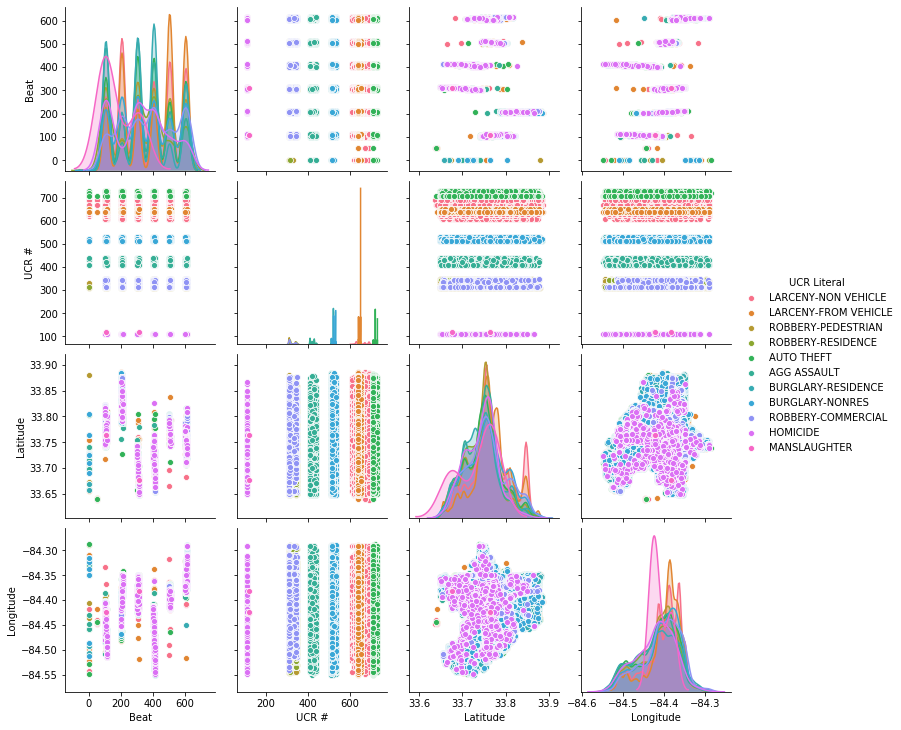

In [14]:
sns.pairplot(crime_record, hue = 'UCR Literal');

### **Has crime gone down?**

1.   Crime increase/decrease by years
2.   Crimes by neighborhood
3.   Specific crimes - use subset of original data

In [0]:
#Parsing dates into years and months

##### **Creating New Features**

In [16]:
#Using occur date instead of report date or possible date
crime_record['Occur Date'].head()

0    2009-01-01
1    2009-01-01
2    2009-01-01
3    2009-01-01
4    2009-01-01
Name: Occur Date, dtype: object

In [0]:
#crime_record['Occur Date'] = pd.to_datetime(crime_record['Occur Date'], infer_datetime_format=True) This create a SetCopyWarning
crime_record['Occur Date'] = crime_record['Occur Date'].apply(pd.to_datetime)

In [0]:
crime_record['Occur_Year'] = crime_record['Occur Date'].dt.year
crime_record['Occur_Month'] = crime_record['Occur Date'].dt.month

#### **Crime increase/decrease by years**

In [19]:
# Not including 2020 
year = crime_record['Occur_Year'].value_counts()[:11].to_dict()
year

{2009: 39326,
 2010: 35529,
 2011: 34852,
 2012: 33382,
 2013: 32398,
 2014: 31115,
 2015: 30058,
 2016: 29006,
 2017: 26386,
 2018: 25611,
 2019: 24853}

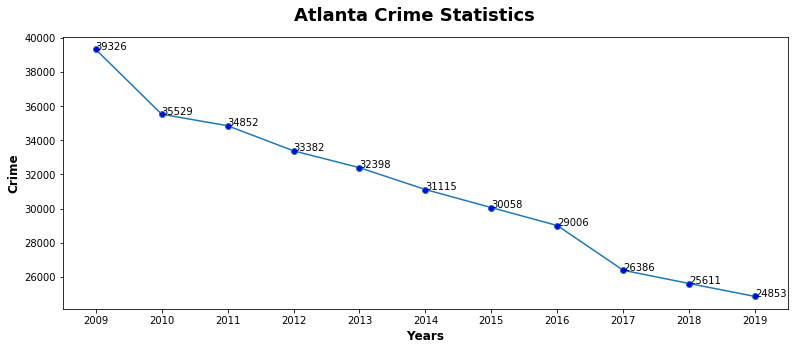

In [20]:
# sorted by key,  a list of tuples
lists = sorted(year.items()) 

# unpack a list of pairs into two tuples
x, y = zip(*lists) 

# fig size
fig, ax = plt.subplots(figsize = (13, 5))
fig.facecolor = 'white'

# graphing line
plt.plot(x, y, marker = 'o', markerfacecolor='blue')

# labeling graph
plt.text (x = 2012, 
          y = 41000, 
          s = 'Atlanta Crime Statistics', 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Years', fontsize = 12, fontweight = 'bold')
plt.ylabel('Crime', fontsize = 12, fontweight = 'bold')

# labeling data
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]))

plt.xticks (range(2009, 2020, 1))

plt.show()

From this graph we can see that overall crime has been down but does this reflect across the board for crimes, or are some crimes becoming more or less prevalent?

### **Neighborhood**

### **Looking at Crime in 2019**
Creating a plotly.scatter_mapbox of crime in Atlanta for 2019

This plotly graph is to highlight the changes in specific crimes in Atlanta.

References used: 
* https://plot.ly/python/subplots/
* https://plot.ly/python/figure-labels/
* https://plot.ly/python/filled-area-plots/

In [21]:
condition = crime_record['Occur_Year'] == 2019
crime_2019 = crime_record[condition]
crime_2019

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month
317884,2019-01-01,2019-01-01,0100,401.0,1384 LUCILE AVE SW,Morning Watch,20,LARCENY-FROM VEHICLE,640,2305,Westview,T,33.74209,-84.43313,2019,1
317890,2019-01-01,2019-01-01,0020,511.0,50 UPPER ALABAMA ST SW,Morning Watch,13,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75194,-84.38964,2019,1
317891,2019-01-01,2019-01-01,0120,511.0,20 BROAD ST,Morning Watch,NaN,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75312,-84.39208,2019,1
317892,2019-01-01,2019-01-01,1740,411.0,3000 CONTINENTAL COLONY PKWY SW,Evening Watch,26,LARCENY-NON VEHICLE,620,2302,Greenbriar,R,33.68077,-84.49370,2019,1
317895,2019-01-01,2019-01-01,0400,512.0,253 TRINITY AVE SW,Morning Watch,18,LARCENY-FROM VEHICLE,640,2305,Downtown,M,33.75082,-84.39615,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,2019-12-31,2019-12-31,2030,105.0,1385 SHARON ST NW,Morning Watch,20,AGG ASSAULT,420,1315K,Hunter Hills,K,33.75486,-84.43287,2019,12
342910,2019-12-31,2019-12-31,432,206.0,262 PHARR RD NE,Morning Watch,NaN,AGG ASSAULT,410,1314,Buckhead Village,B,33.83732,-84.37860,2019,12
342911,2019-12-31,2019-12-31,920,404.0,689 CASCADE AVE SW,Day Watch,18,AGG ASSAULT,410,1314,Westview,T,33.73636,-84.43680,2019,12
342912,2019-12-31,2019-12-31,1853,404.0,763 CASCADE AVE SW,Evening Watch,26,AGG ASSAULT,410,1314,Westview,T,33.73483,-84.43750,2019,12


In [22]:
!pip install chart_studio
import chart_studio

In [23]:
import plotly.express as px

fig = px.scatter_mapbox(crime_2019, lat='Latitude', lon='Longitude', color='UCR Literal', opacity=1.0)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

#### **Creating an Interactive Plotly Graph**

In [0]:
# username = ''
# api_key = ''
# chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [0]:
# py.plot(fig, filename = 'increasecrimes.html', auto_open=True)

In [0]:
# import chart_studio.plotly as py
# py.plot(fig, filename = 'index.html', auto_open=True)

In [0]:
import plotly.io as pio
pio.write_html(fig, file = 'index.html', auto_open=False)

In [28]:
import chart_studio.tools as tls
tls.get_embed('https://plot.ly/~jiobu/1/') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiobu/1.embed" height="525" width="100%"></iframe>'

Did not get to do this because my file was too large

Source:https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

#### **Crime by neighborhoods**
Looking specifically if crimes have increased from 2018 to 2019

#### **More Analysis** 
Decided to check which neighborhoods experienced a growth in crime by creating a multi-index dataframe that calculated the percentage change from 2018 to 2019. I also evaluated 25 neighborhoods that experienced the greatest crime growth. 

In [29]:
crime_record['Neighborhood'].nunique()

243

In [0]:
neighbors = pd.DataFrame(crime_record.groupby(by = ['Occur_Year','Neighborhood']).size()).unstack('Occur_Year')
neighbors = neighbors.reset_index(level = ['Neighborhood'])
neighbors[(0,'Percentage Change')] = (neighbors[(0, 2019)] - neighbors[(0, 2018)])/neighbors[(0, 2018)]*100
neighbors[(0, 'Change' )] = (neighbors[(0, 2019)] - neighbors[(0, 2018)])

In [0]:
pd.set_option('display.max_rows', 300)

increase_neighborhood = neighbors[neighbors[(0,'Change')] >0]

In [32]:
increase_neighborhood = increase_neighborhood.sort_values(by= (0,'Percentage Change'), ascending = False)
increase_neighborhood.loc[:, [('Neighborhood', ''),(0,'Percentage Change'),(0,'Change')]]

Neighborhood                 0       
Occur_Year                                   Percentage Change Change
230                      Westover Plantation        400.000000    4.0
40                                Briar Glen        175.000000    7.0
105                       Green Acres Valley        150.000000    3.0
211                               Tampa Park        150.000000    3.0
39                                 Brentwood        133.333333    4.0
35                              Bolton Hills        100.000000    3.0
36                              Boulder Park        100.000000    3.0
229                       Westminster/Milmar        100.000000    2.0
158                              Niskey Lake        100.000000    1.0
162                                  Oakland        100.000000   14.0
51                               Cabbagetown         97.058824   33.0
23                             Beecher Hills         78.571429   11.0
100                              Fort Valley         73.333333   11.0
130                              Lake Claire         70.212766   33.0
22                           Bankhead/Bolton         68.421053   13.0
43                                 Brookwood         68.181818   15.0
56                        Capitol View Manor         67.857143   19.0
192                           Ridgedale Park         66.666667    8.0
193                        Ridgewood Heights         60.000000    3.0
151                           Monroe Heights         56.521739   13.0
214                The Villages at East Lake         53.125000   17.0
137                            Lincoln Homes         52.631579   10.0
238                      Wilson Mill Meadows         52.631579   10.0
106                       Green Forest Acres         50.000000    3.0
49                             Bush Mountain         50.000000    9.0
111                             Hanover West         50.000000    2.0
108                       Greenbriar Village         50.000000    2.0
59                              Carver Hills         46.428571   13.0
185                          Poncey-Highland         43.478261   70.0
166                               Old Gordon         41.176471    7.0
213         The Villages at Castleberry Hill         40.625000   13.0
220                        Virginia Highland         36.514523   88.0
201                            South Atlanta         36.000000   27.0
12                               Atkins Park         33.333333    2.0
240                                Woodfield         33.333333    1.0
75                               Cross Creek         33.333333    5.0
174                           Peachtree Park         33.333333   20.0
99                            Fort McPherson         33.333333    1.0
231                                 Westview         33.128834   54.0
199                          Scotts Crossing         31.818182   14.0
165                          Old Fourth Ward         30.035336  170.0
67                           Channing Valley         28.205128   11.0
122                               Inman Park         27.164179   91.0
87                             Elmco Estates         26.666667    4.0
163                             Oakland City         25.726141   62.0
141                             Magnum Manor         25.000000    1.0
95                             Fairburn Tell         25.000000    1.0
147                                 Mellwood         25.000000    1.0
54                           Capitol Gateway         25.000000    8.0
209                             Sweet Auburn         24.796748   61.0
2                                 Adamsville         24.537037   53.0
128                                 Kirkwood         24.390244   30.0
203                        South Tuxedo Park         24.210526   23.0
160                            Norwood Manor         23.684211    9.0
175                       Penelope Neighbors         22.222222    4.0
196                         Rosedale Heigh

#### **Plotly Graph**
shows neighborhood, %increase, and numeric change

In [33]:
#Data
x = increase_neighborhood[("Neighborhood", "")]
y = increase_neighborhood[(0, "Percentage Change")] 
z = increase_neighborhood[(0, "Change")]

sortx = sorted(y) 
sorty = [x for _,x in sorted(zip(y,x))]
sortz = [z for _,_,z in sorted(zip(y,x,z))]

fig = go.Figure(
    go.Bar(
        x = sortx,
        y = sorty,
        orientation = "h", 
        text = sortz
    )
)

# Adding labels
annotations = []

y_s = np.round(increase_neighborhood[(0, "Percentage Change")], decimals=0)

for ydn, xd in zip(y_s, x):
    #labeling bar graph
    annotations.append(dict(y=xd, x=ydn + 12,
        text='{:.0f}'.format(ydn) + '%',
        font=dict(family='Arial', size=12,
                  color='rgb(128, 0, 128)'),
                  showarrow=False))
   
#Updating layout

fig.update_layout(
    title={
        'text': "Atlanta Neighborhoods that Experienced an Increase in Crimes From 2018 - 2019",
        'y':0.97,
        'x':0.525,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.update_layout( 
    annotations=annotations,
    autosize=False,
    width=900,
    height=2000
    )


fig.show()

- https://community.plot.ly/t/sort-bars-in-bar-chart-by-value-and-have-each-bar-with-a-different-color/14562
- https://plot.ly/python/setting-graph-size/
- https://plot.ly/python/horizontal-bar-charts/

In [0]:
# username = ''
# api_key = ''
# chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [0]:
# py.plot(fig, filename = 'ucrliteral.html', auto_open=True)

#### **Seaborn Graph**

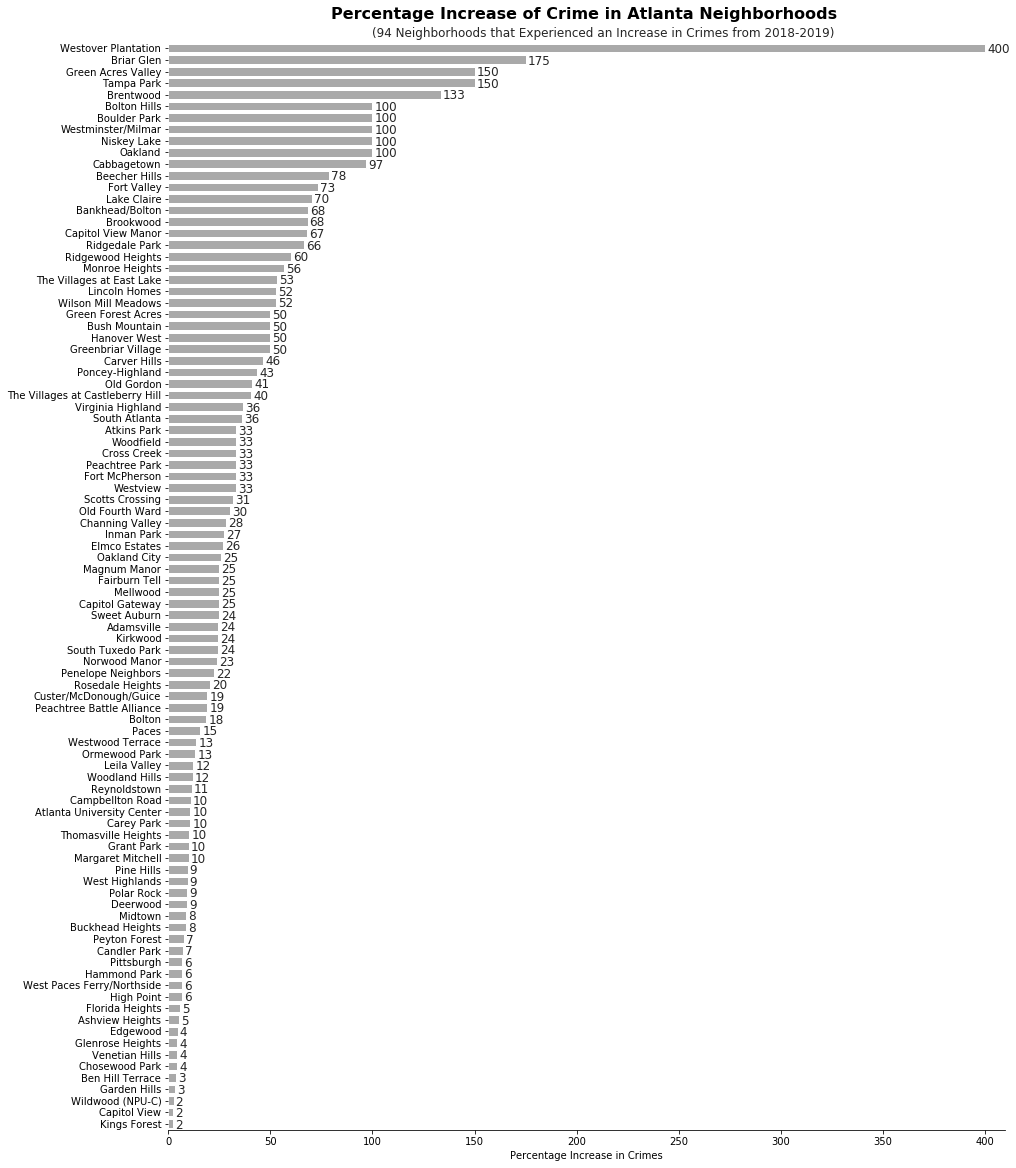

In [36]:
fig_dims = (15, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")

#Plotting Data
sns.barplot(x=(0, 'Percentage Change'), y='Neighborhood', ax=ax, data=increase_neighborhood, color="darkgrey" )

#Labeling Axes
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Percentage Increase in Crimes")
, \n
plt.title('Percentage Increase of Crime in Atlanta Neighborhoods \n',
             fontdict = {'fontsize': 16,
                         'fontweight':'bold',
                         'verticalalignment': 'baseline',
                         'horizontalalignment': 'center'
                         },
             ) 
plt.text(x = 100, y = -1, s = '(94 Neighborhoods that Experienced an Increase in Crimes from 2018-2019)')

#Annotating Bars
def show_values_on_bars(ax, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(ax, np.ndarray):
        for idx, ax in np.ndenumerate(ax):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(ax)
        
show_values_on_bars(ax, "h" , 1)

ax.set_xlim([0, max(increase_neighborhood[(0,'Percentage Change')])+10])



#Changing Width of Bars
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

change_width(ax, .75)


#Formatting Graph
sns.despine(left=True, bottom=False)

plt.rcParams["axes.labelsize"] = 15

plt.show()

Created plot in seaborn in case plotly graph did not work out. 

### **Which Crimes Attribute the Increase in These Neighborhoods?**

#### **Have all crimes in these neighborhoods gone up?**
Looking at the crimes that have caused increases in these neighborhoods.

In [0]:
increase_list = increase_neighborhood[('Neighborhood', '')].to_list()

In [38]:
up_neighborhood = crime_record[crime_record.Neighborhood.isin(increase_list)]
up_neighborhood

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month
2,2009-01-01,2009-01-01,1500,407.0,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282,2009,1
5,2009-01-01,2009-01-01,1645,609.0,1217 CAROLINE ST NE,Evening Watch,24,LARCENY-NON VEHICLE,630,2303,Edgewood,O,33.75786,-84.34875,2009,1
6,2009-01-01,2009-01-01,1740,408.0,2685 METROPOLITAN PARKWAY,Evening Watch,12,LARCENY-NON VEHICLE,630,2303,Venetian Hills,S,33.70827,-84.45385,2009,1
10,2009-01-01,2008-12-31,2300,609.0,195 ARIZONA AVE NE,Morning Watch,13,LARCENY-FROM VEHICLE,640,2305,Edgewood,O,33.75902,-84.33120,2008,12
11,2009-01-01,2008-12-31,2230,610.0,58 SAUNDERS ST NE,Morning Watch,20,LARCENY-FROM VEHICLE,640,2305,Kirkwood,O,33.75441,-84.32465,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342902,2019-12-31,2019-12-31,1020,503.0,1080 PEACHTREE ST NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78409,-84.38353,2019,12
342905,2019-12-31,2019-12-31,1855,602.0,99 KROG ST NE,Morning Watch,18,LARCENY-FROM VEHICLE,640,2305,Inman Park,N,33.75667,-84.36390,2019,12
342906,2019-12-31,2019-12-31,2130,503.0,992 PEACHTREE ST NE,Evening Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78192,-84.38410,2019,12
342911,2019-12-31,2019-12-31,920,404.0,689 CASCADE AVE SW,Day Watch,18,AGG ASSAULT,410,1314,Westview,T,33.73636,-84.43680,2019,12


In [0]:
#Looking at crime patterns in neighborhoods that have experienced an increase
crime_analysis = pd.crosstab(up_neighborhood['Occur_Year'], up_neighborhood['UCR Literal'])

crime_analysis  = crime_analysis.drop([1916, 1920, 1970, 1976,	1979, 1980, 
                 1993, 2001, 2004,	2005,	2006, 2007,	2008])

In [40]:
crime_analysis

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Occur_Year,,,,,,,,,,
2009,1116,2339,594,3175,29,4695,2681,109,803,128
2010,1053,1958,506,2726,43,3614,2779,73,682,98
2011,1058,2071,392,2760,39,3500,3078,80,732,127
2012,1045,2057,336,2154,38,3535,2930,70,758,101
2013,927,1876,365,2058,25,3795,2588,93,789,83
2014,895,1691,388,1903,27,3884,2420,82,736,80
2015,837,1682,320,1628,37,3720,2172,84,709,78
2016,804,1336,379,1297,37,3660,2164,60,548,83
2017,719,1165,256,1006,20,3510,2223,48,428,53


In [41]:
crime_analysis.columns

Index(['AGG ASSAULT', 'AUTO THEFT', 'BURGLARY-NONRES', 'BURGLARY-RESIDENCE',
       'HOMICIDE', 'LARCENY-FROM VEHICLE', 'LARCENY-NON VEHICLE',
       'ROBBERY-COMMERCIAL', 'ROBBERY-PEDESTRIAN', 'ROBBERY-RESIDENCE'],
      dtype='object', name='UCR Literal')

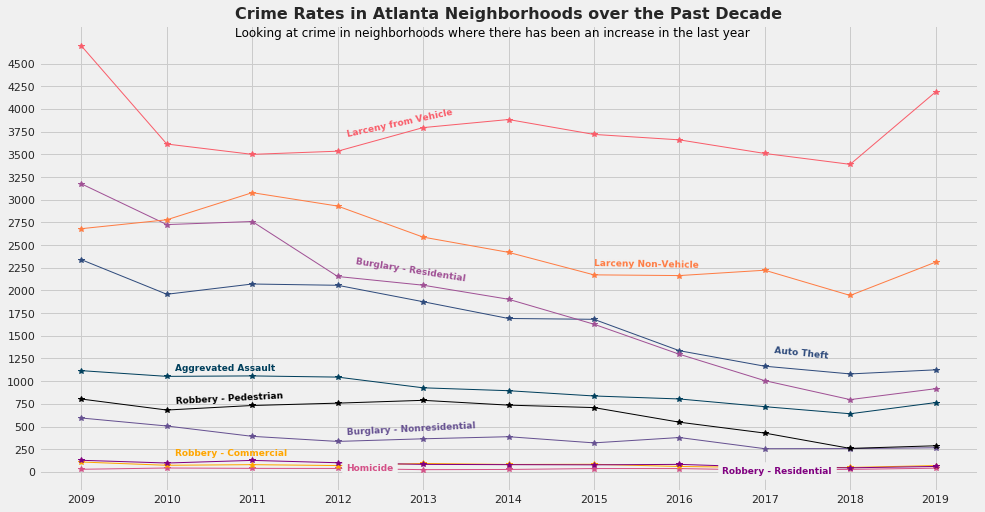

In [42]:
# Playing with loop to generate both lines and labels
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 8))
plt.backgroundcolor = '#f0f0f0'

# Creating line plots
plot_points = []

crimes = crime_analysis.columns

colors_array = ['#003f5c','#2f4b7c','#665191','#a05195',
          '#d45087','#f95d6a','#ff7c43','#ffa600', 
          'black', 'purple']

for crime, color in zip(crimes, colors_array):
    points = plt.plot(crime_analysis[crime], marker='*', color = color, lw=1)
    plot_points.append(points)

plot_points;

# Title, Axes
plt.title("Crime Rates in Atlanta Neighborhoods over the Past Decade",
          fontsize = 16,
          fontweight = 'bold',
          loc = 'center'
          );
plt.text (x = 2010.8, y = 4800,  s = 'Looking at crime in neighborhoods where there has been an increase in the last year', 
          color = 'black', fontsize = 12)

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 4700, 250))

#Sometimes shows up and somethimes does not. 
plt.xlabel = ('Years')
plt.ylabel = ('Crimes')

#Labeling Lines
text = []

x_coordinates = [2010.1, 2017.1, 2012.1, 2012.2, 2009, 2012.1, 2015, 2010.1,  2010.1, 2009]
y_coordinates = [1120,   1250,    410,   2100,      0, 3700,   2250,  175,     750,    0]
labels = ['Aggrevated Assault', 'Auto Theft', 'Burglary - Nonresidential', 
          'Burglary - Residential', '', 'Larceny from Vehicle', 'Larceny Non-Vehicle', 
          'Robbery - Commercial', 'Robbery - Pedestrian', '']
rotations = [0, -6, 3, -9, 0, 12, -1, 0, 3, 0]


for x, y, label, color, rotation in zip(x_coordinates, y_coordinates, labels, colors_array, rotations):
  position = plt.text(x = x, y = y, s = label , color = color, fontsize = 9, 
                      weight = 'bold', rotation = rotation)
  text.append(position)

text;

#Two Other Labels
plt.text(x = 2012.1, y = 10, s = 'Homicide', color = colors_array[4], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0)
plt.text(x = 2016.5, y = -15, s = 'Robbery - Residential', color =colors_array[9], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0 )

plt.show()

In [0]:
types_analysis = pd.DataFrame(up_neighborhood.groupby(by = ['Occur_Year','UCR Literal']).size()).unstack('Occur_Year')
types_analysis = types_analysis.reset_index(level = ['UCR Literal'])
types_analysis[(0,'Change')] = (types_analysis[(0, 2019)] - types_analysis[(0, 2018)])/types_analysis[(0, 2018)]*100

In [44]:
types_analysis.loc[:,[('UCR Literal', ''),(0,'Change')]].sort_values(by= (0, 'Change'), ascending = False)

,UCR Literal,0
Occur_Year,,Change
4,HOMICIDE,46.428571
7,ROBBERY-COMMERCIAL,42.857143
9,ROBBERY-RESIDENCE,33.333333
5,LARCENY-FROM VEHICLE,23.539823
0,AGG ASSAULT,19.188768
6,LARCENY-NON VEHICLE,18.868895
3,BURGLARY-RESIDENCE,15.056462
8,ROBBERY-PEDESTRIAN,11.196911
1,AUTO THEFT,4.166667


In [45]:
from plotly.subplots import make_subplots
from plotly import tools


trace1 = go.Scatter(x = crime_analysis.index,
                    y = crime_analysis['HOMICIDE'],
                    fill = 'tozeroy')
trace2 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['ROBBERY-COMMERCIAL'], 
                    fill = 'tozeroy')
trace3 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['ROBBERY-RESIDENCE'],
                    fill = 'tozeroy' )
trace4 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['LARCENY-FROM VEHICLE'],
                    fill = 'tozeroy')
trace5 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['AGG ASSAULT'],
                    fill = 'tozeroy')
trace6 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['LARCENY-FROM VEHICLE'],
                    fill = 'tozeroy' )
trace7 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['BURGLARY-RESIDENCE'],
                    fill = 'tozeroy')
trace8 = go.Scatter(x = crime_analysis.index, 
                    y = crime_analysis['ROBBERY-PEDESTRIAN'],
                    fill = 'tozeroy')
trace9 = go.Scatter(x = crime_analysis.index, 
                     y = crime_analysis['AUTO THEFT'],
                     fill = 'tozeroy')
trace10 = go.Scatter(x = crime_analysis.index, 
                     y = crime_analysis['BURGLARY-NONRES'],
                     fill = 'tozeroy')

fig = make_subplots(rows=5, cols=2, 
                    vertical_spacing=0.15, 
                    horizontal_spacing = 0.1,
                    subplot_titles=('Homicide',
                                    'Commercial Robbery', 
                                    'Residential Robbery', 
                                    'Vehicle Larceny',
                                    'Aggravated Assault', 
                                    'Non-vehicle Larceny',
                                    'Residential Robbery',
                                    'Pedestrian Robbery',
                                    'Auto Theft',
                                    'Non-residential Burglary')
                    )

fig.append_trace(trace2,  1, 1)
fig.append_trace(trace2,  1, 2)
fig.append_trace(trace3,  2, 1)
fig.append_trace(trace4,  2, 2)
fig.append_trace(trace5,  3, 1)
fig.append_trace(trace6,  3, 2)
fig.append_trace(trace7,  4, 1)
fig.append_trace(trace8,  4, 2)
fig.append_trace(trace9,  5, 1)
fig.append_trace(trace10, 5, 2)

fig.update_layout(height=800, width=600, 
                  title='Crime Increase Over the Past Decade', 
                  font = dict(
                      family = 'Courier New, monospace', 
                      size = 12, 
                      color = "#7f7f7f"
                     ),
                  showlegend = False
)

fig.show()

In [0]:
# username = ''
# api_key = ''
# chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [0]:
# py.plot(fig, filename = 'crimeanalysis.html', auto_open=True)

# **Previous Analysis**
1. Initially took an aggregate of all crimes and looked throughout the years
2.  Then looked at the top 10 neighborhoods with the highest crime counts and then drilled down to the neighborhoods that experienced a surge from the list

In [48]:
crime_record['UCR Literal'].value_counts()

LARCENY-FROM VEHICLE    105630
LARCENY-NON VEHICLE      81942
BURGLARY-RESIDENCE       49577
AUTO THEFT               47067
AGG ASSAULT              25049
ROBBERY-PEDESTRIAN       17167
BURGLARY-NONRES          10950
ROBBERY-COMMERCIAL        2317
ROBBERY-RESIDENCE         2230
HOMICIDE                   982
MANSLAUGHTER                 3
Name: UCR Literal, dtype: int64

In [0]:
#Calculating  specific crimes by years
crime_year = pd.crosstab(crime_record['Occur_Year'],  crime_record['UCR Literal'])

crime_year  = crime_year.drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                 1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])

In [50]:
crime_year

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Occur_Year,,,,,,,,,,,
2009,2613,5625,1682,7393,77,10966,8295,0,296,2070,309
2010,2612,4996,1272,6713,89,9176,8510,0,218,1709,234
2011,2536,5205,996,6408,84,8589,8723,0,217,1826,268
2012,2521,5098,825,5326,83,8825,8438,0,179,1842,245
2013,2275,4483,971,4976,81,9343,7905,0,284,1882,198
2014,2238,4142,1030,4436,87,9459,7353,0,221,1938,211
2015,2156,4236,863,3921,87,9593,7044,0,235,1737,186
2016,2193,3849,976,3400,114,9995,6564,0,201,1508,206
2017,2036,3195,765,2629,86,9826,6433,0,157,1127,132


In [51]:
crime_year.columns

Index(['AGG ASSAULT', 'AUTO THEFT', 'BURGLARY-NONRES', 'BURGLARY-RESIDENCE',
       'HOMICIDE', 'LARCENY-FROM VEHICLE', 'LARCENY-NON VEHICLE',
       'MANSLAUGHTER', 'ROBBERY-COMMERCIAL', 'ROBBERY-PEDESTRIAN',
       'ROBBERY-RESIDENCE'],
      dtype='object', name='UCR Literal')

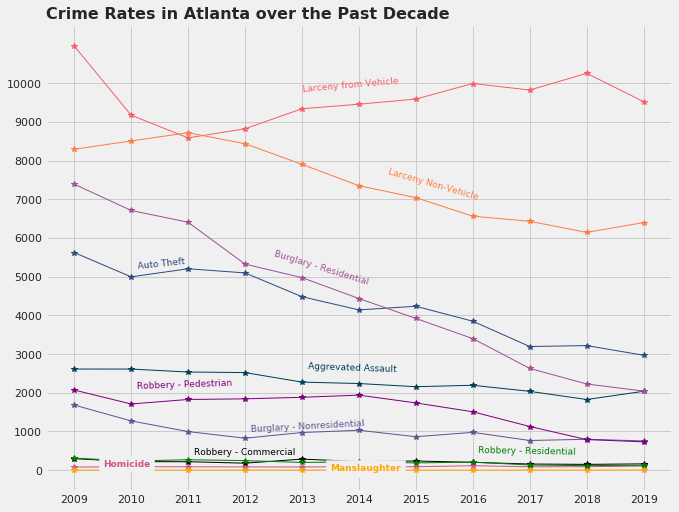

In [52]:
# Playing with loop to generate both lines and labels
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
plt.backgroundcolor = '#f0f0f0'

# Creating line plots
plot_points = []

crimes = crime_year.columns

colors_array = ['#003f5c','#2f4b7c','#665191','#a05195',
          '#d45087','#f95d6a','#ff7c43','#ffa600', 
          'black', 'purple', 'green']

for crime, color in zip(crimes, colors_array):
    points = plt.plot(crime_year[crime], marker='*', color = color, lw=1)
    plot_points.append(points)

plot_points;

# Title, Axes
plt.title ("Crime Rates in Atlanta over the Past Decade",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 11000, 1000))

#Sometimes shows up and somethimes does not. 
plt.xlabel = ('Years')
plt.ylabel = ('Crimes')

#Labeling Lines
text = []

x_coordinates = [2013.1, 2010.1, 2012.1, 2012.5, 2009.5, 2013, 2014.5, 2013.5, 2011.1, 2010.1, 2016.1]
y_coordinates = [2550, 5200, 1000, 4800, 100, 9800, 7000, -10, 400, 2100, 400]
labels = ['Aggrevated Assault', 'Auto Theft', 'Burglary - Nonresidential', 
          'Burglary - Residential', '', 'Larceny from Vehicle', 'Larceny Non-Vehicle', 
          '', 'Robbery - Commercial', 'Robbery - Pedestrian', 'Robbery - Residential']
rotations = [-2, 6, 3, -17, 0, 5, -16, 0, 0, 2, -1]


for x, y, label, color, rotation in zip(x_coordinates, y_coordinates, labels, colors_array, rotations):
  position = plt.text(x = x, y = y, s = label , color = color, fontsize = 9, rotation = rotation)
  text.append(position)

text;

#Two Other Labels
plt.text(x = 2009.5, y = 100, s = 'Homicide', color = colors_array[4], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0)
plt.text(x = 2013.5, y = -15, s = 'Manslaughter', color =colors_array[7], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0 )



plt.show()

In [0]:
types = pd.DataFrame(crime_record.groupby(by = ['Occur_Year','UCR Literal']).size()).unstack('Occur_Year')
types = types.reset_index(level = ['UCR Literal'])
types[(0,'Change')] = (types[(0, 2019)] - types[(0, 2018)])/types[(0, 2018)]*100

In [54]:
types.loc[:,[('UCR Literal', ''),(0,'Change')]]

,UCR Literal,0
Occur_Year,,Change
0,AGG ASSAULT,11.616438
1,AUTO THEFT,-7.766387
2,BURGLARY-NONRES,-5.395232
3,BURGLARY-RESIDENCE,-8.221024
4,HOMICIDE,18.181818
5,LARCENY-FROM VEHICLE,-7.154693
6,LARCENY-NON VEHICLE,4.149715
7,MANSLAUGHTER,NaN
8,ROBBERY-COMMERCIAL,8.783784


Overall crime might have been on a downward trajectory but several types of crime have rise - aggravated assault (12%), non-vehicle larceny (4%), homicide(18%), and commercial (9%) and residential (10%) burglary. Manslaughter has a NAN value because previous years were 0 and it rose from 0 to 3. 

In [55]:
from plotly.subplots import make_subplots
from plotly import tools

trace1 = go.Scatter(x = crime_year.index, 
                    y = crime_year['MANSLAUGHTER'], 
                    fill = 'tozeroy')
trace2 = go.Scatter(x = crime_year.index,
                    y = crime_year['HOMICIDE'],
                    fill = 'tozeroy')
trace3 = go.Scatter(x = crime_year.index, 
                    y = crime_year['AGG ASSAULT'], 
                    fill = 'tozeroy')
trace4 = go.Scatter(x = crime_year.index, 
                    y = crime_year['ROBBERY-RESIDENCE'],
                    fill = 'tozeroy' )
trace5 = go.Scatter(x = crime_year.index, 
                    y = crime_year['ROBBERY-COMMERCIAL'],
                    fill = 'tozeroy')
trace6 = go.Scatter(x = crime_year.index, 
                    y = crime_year['LARCENY-NON VEHICLE'],
                    fill = 'tozeroy')
trace7 = go.Scatter(x = crime_year.index, 
                    y = crime_year['BURGLARY-NONRES'],
                    fill = 'tozeroy' )
trace8 = go.Scatter(x = crime_year.index, 
                    y = crime_year['LARCENY-FROM VEHICLE'],
                    fill = 'tozeroy')
trace9 = go.Scatter(x = crime_year.index, 
                    y = crime_year['ROBBERY-PEDESTRIAN'],
                    fill = 'tozeroy')
trace10 = go.Scatter(x = crime_year.index, 
                     y = crime_year['AUTO THEFT'],
                     fill = 'tozeroy')
trace11 = go.Scatter(x = crime_year.index, 
                     y = crime_year['BURGLARY-RESIDENCE'],
                     fill = 'tozeroy')

fig = make_subplots(rows=4, cols=3, 
                    vertical_spacing=0.15, 
                    horizontal_spacing = 0.1,
                    subplot_titles=('Manslaughter', 
                                    'Homicide',
                                    'Aggravated Assault', 
                                    'Residential Robbery', 
                                    'Commercial Robbery',
                                    'Non-Vehicle Larceny', 
                                    'Non-Residential Burglary',
                                    'Larceny from Vehicle',
                                    'Pedesterian Robbery',
                                    'Auto Theft', 
                                    'Residential Burglary')
                    )
fig.append_trace(trace1,  1, 1)
fig.append_trace(trace2,  1, 2)
fig.append_trace(trace3,  1, 3)
fig.append_trace(trace4,  2, 1)
fig.append_trace(trace5,  2, 2)
fig.append_trace(trace6,  2, 3)
fig.append_trace(trace7,  3, 1)
fig.append_trace(trace8,  3, 2)
fig.append_trace(trace9,  3, 3)
fig.append_trace(trace10, 4, 1)
fig.append_trace(trace11, 4, 2)

fig.update_layout(height=700, width=900, 
                  title='Crime Increase/Decrease Over the Past Decade (By Greatest Increase)', 
                  font = dict(
                      family = 'Courier New, monospace', 
                      size = 12, 
                      color = "#7f7f7f"
                     ),
                  showlegend = False
)

fig.show()

In [0]:
# username = '' # your username
# api_key =  '' # your api key - go to profile > settings > regenerate key
# chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [0]:
# py.plot(fig, filename = 'increasecrimes.html', auto_open=True)

### **Previous analysis metric**
Took neighborhoods that had the greatest numeric crimes (sum of 2009 to 2019)

In [0]:
# Too many neighborhoods to evaluate
# Will look at top 20

In [59]:
crime_record['Neighborhood'].nunique()

243

In [60]:
crime_record['Neighborhood'].value_counts()[:10]

Downtown           25386
Midtown            18240
Old Fourth Ward     9945
West End            8506
Lenox               6203
North Buckhead      5651
Vine City           5506
Greenbriar          5487
Sylvan Hills        5451
Grant Park          5293
Name: Neighborhood, dtype: int64

In [0]:
areas = crime_record['Neighborhood'].unique()
list_to_remove = ['Downtown','Midtown','Old Fourth Ward','West End','Lenox',
                  'North Buckhead ', 'Greenbriar','Vine City', 'Sylvan Hills',
                  'Grant Park']

final_list= list(set(areas).difference(set(list_to_remove)))
final_list.pop(0)
final_list.remove('North Buckhead')
final_list;

In [62]:
#Checking that the top 10 neighborhoods are not in the final list to be deleted.
'Vine City' in final_list

False

In [0]:
neighborhood = pd.crosstab(crime_record['Neighborhood'], crime_record['Occur_Year'])
neighborhood = neighborhood.drop(final_list);

In [64]:
neighborhood = neighborhood.T.drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                                    1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])
neighborhood

Neighborhood,Downtown,Grant Park,Greenbriar,Lenox,Midtown,North Buckhead,Old Fourth Ward,Sylvan Hills,Vine City,West End
Occur_Year,,,,,,,,,,
2009,3156,570,652,794,2224,582,1195,574,524,859
2010,2579,602,564,645,1760,592,1032,576,423,1030
2011,2660,563,543,569,1705,433,1199,628,376,956
2012,2203,516,556,546,1589,543,1080,558,449,838
2013,2344,540,576,550,1801,540,947,523,534,906
2014,2389,526,522,522,1715,493,879,498,638,814
2015,2262,424,416,624,1521,427,815,520,658,800
2016,1824,441,522,518,1309,544,784,501,595,681
2017,1814,352,427,520,1402,477,694,375,360,574


According to this chart you can see that 3 out of these top 10 neighborhoods have seen a surge in crime in 2019 - Grant Park, Midtown and Old Fourth Ward

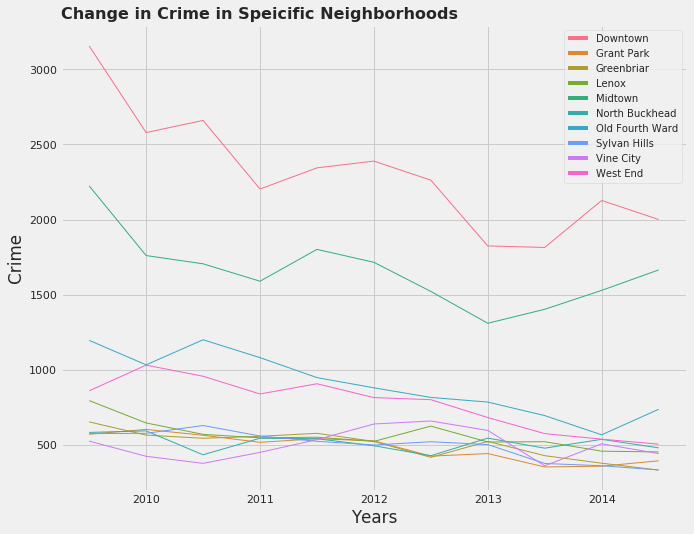

In [65]:
#Plot figure
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = neighborhood, hue = 'Neighborhood', dashes= False, legend='brief', lw = 1)
plt.legend(fontsize = 10,  loc = 'best')

# Title, Axes
plt.title ("Change in Crime in Speicific Neighborhoods",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

ax.set_xticklabels(range(2009, 2020, 1 ))
ax.set_yticklabels(range(0, 3500, 500))

#Sometimes shows up and somethimes does not. 
ax.set(xlabel='Years', ylabel='Crime')

plt.show()

#### **Further Analysis of Crime** 
Looking specifically at neighborhoods where crime has risen in the last year. 

In [66]:
condition = (crime_record['Neighborhood']=='Grant Park')|(crime_record['Neighborhood']=='Midtown') | (crime_record['Neighborhood']=='Old Fourth Ward')
rise = crime_record[condition]
rise.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month
15,2009-01-01,2009-01-01,900,604.0,626 DEKALB AVE SE,Day Watch,18,LARCENY-FROM VEHICLE,640,2305,Old Fourth Ward,M,33.75283,-84.36687,2009,1
16,2009-01-01,2008-12-31,1915,503.0,422 9TH ST NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78080,-84.37334,2008,12
18,2009-01-01,2008-12-31,1700,502.0,188 14TH STREET,Day Watch,18,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78663,-84.38139,2008,12
19,2009-01-01,2008-12-29,1700,614.0,897 MONROE CIR NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77917,-84.36851,2008,12
25,2009-01-01,2009-01-01,1200,505.0,6TH ST NE / W PEACHTREE ST NE,Evening Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77754,-84.38730,2009,1


In [67]:
#Calculating  specific crimes by years
rise_crime = pd.crosstab(rise['Occur_Year'], rise['UCR Literal'])

rise_crime  = rise_crime.drop([1916, 1976, 1993, 2004, 2007, 2008])

rise_crime

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Occur_Year,,,,,,,,,,
2009,163,527,146,319,4,1844,764,29,179,14
2010,157,409,117,302,6,1445,750,18,173,17
2011,170,440,60,269,6,1415,888,17,174,28
2012,136,392,86,213,6,1313,832,12,175,20
2013,137,369,72,195,6,1536,773,32,157,11
2014,107,356,95,196,2,1499,673,18,158,16
2015,124,341,60,211,2,1257,598,23,135,9
2016,112,231,96,169,5,1150,637,13,113,8
2017,102,236,63,96,2,1136,700,8,96,9


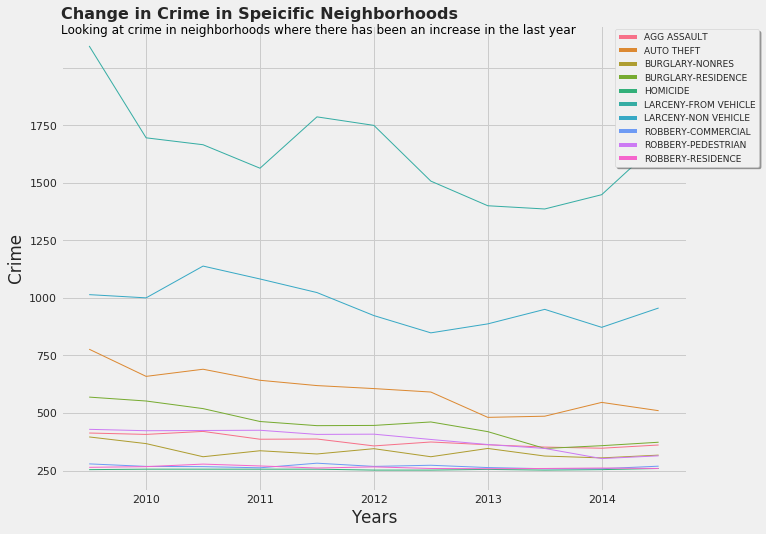

In [68]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = rise_crime, hue = 'Neighborhood', dashes= False, legend='brief', lw = 1)
ax.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1, fontsize = 9)

# Title, Axes
plt.title ("Change in Crime in Speicific Neighborhoods",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

ax.set_xticklabels(range(2009, 2020, 1 ))
ax.set_yticklabels(range(0, 1800, 250))

#Sometimes shows up and somethimes does not. 
ax.set(xlabel='Years', ylabel='Crime')

plt.text (x = 2008.5, y = 1900,  s = 'Looking at crime in neighborhoods where there has been an increase in the last year', 
          color = 'black', fontsize = 12)

plt.show ()

According to the graph, 8 out of the 10 reported crimes have increased in these neighborhoods in the past year.

#### **Looking Deeper**
Taking a look to see which crimes increased and by how much in these neighborhoods.

In [0]:
condition_year = (rise['Occur_Year'] == 2019) |(rise['Occur_Year'] == 2018)

In [70]:
rise_year = rise[condition_year]
rise_year

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month
292275,2018-01-01,2018-01-01,1330,604.0,700 MCGRUDER ST NE,Evening Watch,18,AUTO THEFT,710,2404,Old Fourth Ward,M,33.75860,-84.36513,2018,1
292307,2018-01-01,2018-01-01,1029,505.0,620 PEACHTREE ST NE @WINDSOR,Day Watch,26,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77159,-84.38619,2018,1
292339,2018-01-02,2018-01-02,1815,505.0,893 PEACHTREE ST NE,Evening Watch,18,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77853,-84.38431,2018,1
292345,2018-01-02,2018-01-02,1250,605.0,520 BOULEVARD SE,Day Watch,24,LARCENY-NON VEHICLE,630,2303,Grant Park,W,33.74070,-84.36764,2018,1
292352,2018-01-02,2018-01-02,930,604.0,626 DEKALB AVE SE,Evening Watch,26,BURGLARY-RESIDENCE,511,2202,Old Fourth Ward,M,33.75283,-84.36687,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342897,2019-12-31,2019-12-30,1830,505.0,323 7TH ST NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77823,-84.37971,2019,12
342899,2019-12-31,2019-12-30,2100,614.0,892 VEDADO WAY NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77891,-84.37143,2019,12
342900,2019-12-31,2019-12-30,2300,614.0,845 CHARLES ALLEN DR NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77784,-84.37266,2019,12
342902,2019-12-31,2019-12-31,1020,503.0,1080 PEACHTREE ST NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78409,-84.38353,2019,12


In [0]:
test = rise_year[['Occur_Year','Neighborhood','UCR Literal']]
increase = pd.DataFrame(test.groupby(by = ['Occur_Year','UCR Literal']).size()).unstack('Occur_Year')
increaseT = increase.reset_index(level = ['UCR Literal'])
increaseT[(0,'Change')] = (increaseT[(0, 2019)] - increaseT[(0, 2018)])/increaseT[(0, 2018)]*100

In [72]:
increaseT

UCR Literal     0                  
Occur_Year                        2018  2019      Change
0                    AGG ASSAULT    97   111   14.432990
1                     AUTO THEFT   296   260  -12.162162
2                BURGLARY-NONRES    55    67   21.818182
3             BURGLARY-RESIDENCE   108   123   13.888889
4                       HOMICIDE     4     9  125.000000
5           LARCENY-FROM VEHICLE  1198  1425   18.948247
6            LARCENY-NON VEHICLE   622   706   13.504823
7             ROBBERY-COMMERCIAL     8    19  137.500000
8             ROBBERY-PEDESTRIAN    52    64   23.076923
9              ROBBERY-RESIDENCE    11     9  -18.181818

#**Other Questions**
This section does not answer the above question above overall crime/but I wanted to look further into time and how this affects crime. This is more from a saftey and precautionary point of view. 

### **Time**

#### **Finding out if time of year affects crime type**

In [73]:
cut_points = [0, 3, 6, 9, 12]
label_names = ['0-3','4-6','7-9','10-12']
crime_record['months_categories'] = pd.cut(crime_record['Occur_Month'], cut_points, labels=label_names)
crime_record['months_categories'].value_counts()

7-9      91848
10-12    88461
4-6      87759
0-3      74846
Name: months_categories, dtype: int64

In [74]:
specific_months = pd.crosstab(crime_record['Occur_Year'], crime_record['months_categories']).drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                                    1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])
specific_months = specific_months.T
specific_months

Occur_Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
months_categories,,,,,,,,,,,
0-3,9097,7377,7195,7281,7451,6617,6662,6459,5570,5812,5267
4-6,10180,9269,9253,8658,8475,7723,7711,7235,6477,6419,6323
7-9,10146,9518,9599,8986,8722,8275,8187,7922,7079,6622,6744
10-12,9903,9365,8805,8457,7750,8500,7498,7390,7260,6758,6519


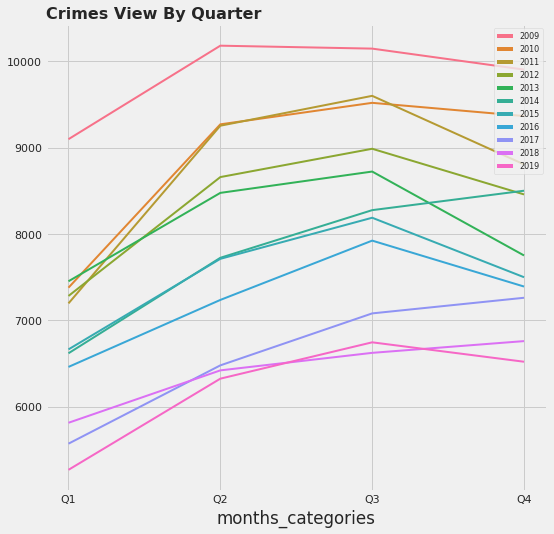

In [75]:
#Plot figure
plt.figure(figsize = (8, 8))
ax = sns.lineplot(data = specific_months, hue = 'Occur_year', dashes= False, legend='brief', lw = 2)
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), shadow=True, ncol=1, fontsize = 11)

# Title, Axes
plt.title ("Crimes View By Quarter",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left')


plt.xticks(np.arange(4), ('Q1', 'Q2', 'Q3', 'Q4'))
      

plt.legend(fontsize = 8, 
           loc = 'upper right')

plt.show()

### **Time of Day** 
For 2019 sample data, looking how time of day affects the types of crimes that occur.

In [76]:
crime_2019['Occur Time'].value_counts()

1800    465
2000    444
1200    439
1900    431
1700    396
       ... 
744       1
742       1
741       1
1403      1
734       1
Name: Occur Time, Length: 2347, dtype: int64

Tried several methods to sort this column. This column has a dtype of object, so first I tried to convert to an hours and minutes format using the pd.to_date(crime_2019['Occur Time'], unit = 'm').dt.strftime('%H:%M'). This converted the the column into hours and minute but unfortunately, I was unable to sort this colum. Therefore, I did the next best thing and changed the column into an integers so that this column could be sorted and used for further exploration.



In [77]:
crime_2019['Occur Time'].dtype

dtype('O')

In [0]:
crime_2019 = crime_2019.copy()

In [0]:
crime_2019['Occur Time'] = crime_2019['Occur Time'].astype(int)

In [80]:
crime_2019['Occur Time'].dtype

dtype('int64')

In [0]:
bins = pd.interval_range(start = 0, freq = 100, end = 2400, closed ='left')
crime_2019['time_categories'] = pd.cut(crime_2019['Occur Time'], bins = bins, duplicates = 'raise')

In [82]:
crime_2019['time_categories'].value_counts()

[1900, 2000)    1675
[1800, 1900)    1670
[2000, 2100)    1572
[2100, 2200)    1487
[1700, 1800)    1451
[2200, 2300)    1424
[1600, 1700)    1322
[1200, 1300)    1301
[1500, 1600)    1271
[0, 100)        1238
[2300, 2400)    1217
[1400, 1500)    1124
[1300, 1400)    1072
[1100, 1200)     936
[1000, 1100)     901
[800, 900)       799
[100, 200)       771
[900, 1000)      724
[200, 300)       643
[300, 400)       539
[700, 800)       484
[400, 500)       445
[600, 700)       412
[500, 600)       375
Name: time_categories, dtype: int64

In [0]:
def new_column(x):
  if 0 < x <100:
    val = '12:00am'
  elif 100 <= x < 200:
    val = '1:00am'
  elif 200 <= x < 300:
    val = '2:00am' 
  elif 300 <= x < 400:
    val = '3:00am'
  elif 400 <= x < 500:
    val = '4:00am'
  elif 500 <= x < 600:
    val = '5:00am'
  elif 600 <= x < 700:
    val = '6:00am'
  elif 700 <= x < 800:
    val = '7:00am'
  elif 800 <= x < 900:
    val = '8:00am'
  elif 900 <= x < 1000:
    val = '9:00am'
  elif 1000 <= x < 1100:
    val = '10:00am'
  elif 1100 <= x < 1200:
    val = '11:00am'
  elif 1200 <= x < 1300:
    val = '12:00pm'
  elif 1300 <= x < 1400:
    val = '1:00pm'
  elif 1400 <= x < 1500:
    val = '2:00pm' 
  elif 1500 <= x < 1600:
    val = '3:00pm'
  elif 1600 <= x < 1700:
    val = '4:00pm'
  elif 1700 <= x < 1800:
    val = '5:00pm'
  elif 1800 <= x < 1900:
    val = '6:00pm'
  elif 1900 <= x < 2000:
    val = '7:00pm'
  elif 2000 <= x < 2100:
    val = '8:00pm'
  elif 2100 <= x < 2200:
    val = '9:00pm'
  elif 2200 <= x < 2300:
    val = '10:00pm'
  else:
    val = '11:00pm'
  return val

In [0]:
crime_2019['Hours'] = crime_2019['Occur Time'].apply(new_column)

In [0]:
crime_2019['Hours'] = crime_2019['Occur Time'].apply(new_column)

#### **Plotly Histogram (used loosely)**

In [86]:
fig2 = px.histogram(crime_2019, x = "Hours", color="UCR Literal")
fig2.update_xaxes({'categoryorder':'array', 'categoryarray':['12:00am', '1:00am','2:00am','3:00am','4:00am', '5:00am', '6:00am', '7:00am','8:00am','9:00am','10:00am', '11:00am', '12:00pm', '1:00pm','2:00pm','3:00pm','4:00pm', '5:00pm', '6:00pm', '7:00pm','8:00pm','9:00pm','10:00pm', '11:00pm']})
fig2.show()

**Uncomment this section after loading the Georgia.shp and Georgia.shx files**

#### **GeoPandas**
Looking at times of crime by neighborhood

Source: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [87]:
!pip install geopandas

     |████████████████████████████████| 931kB 5.0MB/s 
     |████████████████████████████████| 10.4MB 93kB/s 
     |████████████████████████████████| 14.7MB 2.4MB/s 


In [88]:
!pip install descartes

In [0]:
import geopandas as gpd
import pyproj 
from pyproj import CRS
import descartes
import shapely
from shapely.geometry import Point, Polygon

In [0]:
# from google.colab import files
# upload = files.upload()

# The two files are uploaded into my github
# Unfortunately, I cannot pass through the raw files

In [0]:
# shape = gpd.read_file('Cities_Georgia.shp')

In [0]:
# df = crime_2019.copy()
# crs_4326 = CRS("WGS84")
# df.head()

#https://pyproj4.github.io/pyproj/stable/gotchas.html#init-auth-auth-code-should-be-replaced-with-auth-auth-code (+init=<auth>:<auth_code> should be replaced with <auth>:<auth_code> )

In [0]:
# geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# geometry[:3]

In [0]:
# geo_df = gpd.GeoDataFrame(df, #specify our data
#                           crs = crs_4326, #specify our coordinate reference system
#                           geometry = geometry) #specify the geometry list we created
# geo_df.head()

In [0]:
# print(geo_df['Latitude'].min(),geo_df['Latitude'].max() )
# print(geo_df['Longitude'].min(),geo_df['Longitude'].max() )

In [0]:
# fig, ax = plt.subplots(figsize = (10, 15))

# plt.xlim(-84.55, -84.29)
# plt.ylim(33.64, 33.88)
# shape.plot(ax = ax, alpha = 0.4, color = 'grey' )

# geo_df[geo_df['Hours'] == '12:00am'].plot(ax = ax, markersize = 20, color = '#a6cee3', marker = 'o', label ='12:00am')
# geo_df[geo_df['Hours'] == '1:00am' ].plot(ax = ax, markersize = 20, color = '#1f78b4', marker = 'o', label ='1:00am' )
# geo_df[geo_df['Hours'] == '2:00am' ].plot(ax = ax, markersize = 20, color = '#b2df8a', marker = 'o', label ='2:00am' )
# geo_df[geo_df['Hours'] == '3:00am' ].plot(ax = ax, markersize = 20, color = '#33a02c', marker = 'o', label ='3:00am' )
# geo_df[geo_df['Hours'] == '4:00am' ].plot(ax = ax, markersize = 20, color = '#fb9a99', marker = 'o', label ='4:00am' )
# geo_df[geo_df['Hours'] == '5:00am' ].plot(ax = ax, markersize = 20, color = '#e31a1c', marker = 'o', label ='5:00am' )
# geo_df[geo_df['Hours'] == '6:00am' ].plot(ax = ax, markersize = 20, color = '#fdbf6f', marker = 'o', label ='6:00am' )
# geo_df[geo_df['Hours'] == '7:00am' ].plot(ax = ax, markersize = 20, color = '#ff7f00', marker = 'o', label ='7:00am' )
# geo_df[geo_df['Hours'] == '8:00am' ].plot(ax = ax, markersize = 20, color = '#cab2d6', marker = 'o', label ='8:00am' )
# geo_df[geo_df['Hours'] == '9:00am' ].plot(ax = ax, markersize = 20, color = '#6a3d9a', marker = 'o', label ='9:00am' )
# geo_df[geo_df['Hours'] == '10:00am'].plot(ax = ax, markersize = 20, color = '#ffff99', marker = 'o', label ='10:00am')
# geo_df[geo_df['Hours'] == '11:00am'].plot(ax = ax, markersize = 20, color = '#b15928', marker = 'o', label ='11:00am')
# geo_df[geo_df['Hours'] == '12:00pm'].plot(ax = ax, markersize = 20, color = '#8dd3c7', marker = 'o', label ='12:00pm')
# geo_df[geo_df['Hours'] == '1:00pm' ].plot(ax = ax, markersize = 20, color = '#ffffb3', marker = 'o', label ='1:00pm' )
# geo_df[geo_df['Hours'] == '2:00pm' ].plot(ax = ax, markersize = 20, color = '#bebada', marker = 'o', label ='2:00pm' )
# geo_df[geo_df['Hours'] == '3:00pm' ].plot(ax = ax, markersize = 20, color = '#fb8072', marker = 'o', label ='3:00pm' )
# geo_df[geo_df['Hours'] == '4:00pm' ].plot(ax = ax, markersize = 20, color = '#80b1d3', marker = 'o', label ='4:00pm' )
# geo_df[geo_df['Hours'] == '5:00pm' ].plot(ax = ax, markersize = 20, color = '#fdb462', marker = 'o', label ='5:00pm' )
# geo_df[geo_df['Hours'] == '6:00pm' ].plot(ax = ax, markersize = 20, color = '#b3de69', marker = 'o', label ='6:00pm' )
# geo_df[geo_df['Hours'] == '7:00pm' ].plot(ax = ax, markersize = 20, color = '#fccde5', marker = 'o', label ='7:00pm' )
# geo_df[geo_df['Hours'] == '8:00pm' ].plot(ax = ax, markersize = 20, color = '#d9d9d9', marker = 'o', label ='8:00pm' )
# geo_df[geo_df['Hours'] == '9:00pm' ].plot(ax = ax, markersize = 20, color = '#bc80bd', marker = 'o', label ='9:00m'  )
# geo_df[geo_df['Hours'] == '10:00pm'].plot(ax = ax, markersize = 20, color = '#ccebc5', marker = 'o', label ='10:00pm')
# geo_df[geo_df['Hours'] == '11:00pm'].plot(ax = ax, markersize = 20, color = '#ffed6f', marker = 'o', label ='11:00pm')
# #Geopandas did not seem to like using a loop for choosing colors, so I just cut and paste the above code - 24x to avoid an error

# ax.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1, fontsize = 9)
# plt.show()

Wanted to work with a shp file to showcase crimes by time but did not find this as useful as the plotly express map.

#### **Scatter_mapbox**

In [0]:
# fig = px.scatter_mapbox(crime_2019, lat='Latitude', lon='Longitude', color='Hours', opacity=1.0)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

This plot while interactive does not give as much information as the bar graph created above using the hours column in the crime_2019 sample dataset.